#  Project 3-C 
**by Kartikeya Kumar and Karan Shah**

In [29]:
import numpy as np
import matplotlib.pyplot as plt # Core plotting support
%matplotlib inline

np.random.seed(1611044230)


In [30]:
#Global Variables
num_countries = 4 #No of countries on the map
M = 100 #Grid size M x N
N = 100
POP_DENSITY = 100 #Max number of people in each cell
attributes = ["Country No " , "Population Density", "Birth Rate", "Death Rate", "Wealth Score", "Elevation", "Population Counter"]


In [31]:
# It takes in mean and size and returns a Gaussian distribution as proposed in conceptual model. 
# Check distributionGen.ipnyb for plots.

def create_distribution(size, p):
    assert(p>=0.0 and p<=1.0),"Straight outta bounds"
    sigma = 1
    mu = 0
    s = size

    x = np.linspace(0,1,s)
    y=1/( np.sqrt(2 * np.pi) *np.exp((-6*p+6*x)**2 / 2))
    y=y/0.4

    maxind = np.searchsorted(y,1.0)
    minind = np.searchsorted(y,0.0)

    y=y[minind:maxind]
    np.random.shuffle(y)

    return y

In [32]:
#Initialize the World Grid and assign numbers to countries. Need to make this dynamic
def initialize_world(m, n, num_attributes, num_countries):
    world = np.empty([m, n, num_attributes], dtype = float)
    no = num_countries/2
    for k in range(1, num_countries+1):
        if k <= no:
            naxis = 0
            maxis = k
        else:
            naxis = 1
            maxis = k-no
            
        world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,0]=k
    
    return world


In [33]:
#Initialize the Dictionary representing each country and their attribute values
#print(len(attributes))
#print(np.zeros( len(attributes)))
def initialize_country_properties(num_countries):
    country_properties = {}
    for i in range(1, num_countries + 1):
        value = np.zeros(len(attributes))
        value[0] = i
        value[1] = np.random.uniform(0.3, 0.7) #Popdensity
        value[2] = np.random.uniform(0.1, 0.4) #Birth Rate
        value[3] = np.random.uniform(0.05, 0.3) #Death Rate
        value[4] = np.random.uniform() 
        value[5] = np.random.uniform()
        country_properties[i] = value
    #print(country_properties)
    return country_properties

In [34]:
def distribute_values(M, N, dataArray):
    no = num_countries/2
    print(dataArray)
    for k in dataArray:
        for i in range(1,len(attributes)-1):
            #dist = create_distribution(world[:,:,i].size,dataArray[k][i] )
            
            if k <= no:
                naxis = 0
                maxis = k
            else:
                naxis = 1
                maxis = k-no
            
            dist = create_distribution(world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i].size, dataArray[k][i])
            dist = np.reshape(dist, world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i].shape)
            
            world[(maxis-1)*M/no : maxis*M/no, ((naxis)/2)*N : ((naxis+1)/2)*N,i] = dist
        world[(maxis-1)*M/no:maxis*M/no, ((naxis)/2)*N: ((naxis+1)/2)*N,len(attributes)-1] = POP_DENSITY* world[(maxis-1)*M/no:maxis*M/no, ((naxis)/2)*N: ((naxis+1)/2)*N,1]
        totalpop = np.sum(world[(maxis-1)*M/no:maxis*M/no, ((naxis)/2)*N: ((naxis+1)/2)*N,len(attributes)-1])
        dataArray[k][len(attributes) - 1] = totalpop
    print(dataArray)

In [35]:
#def count_pop()

In [36]:
world = initialize_world(M, N, len(attributes), num_countries)
country_properties = initialize_country_properties(num_countries)
distribute_values(M,N,country_properties)


{1: array([ 1.        ,  0.33073281,  0.325544  ,  0.07799667,  0.44443457,
        0.97188001,  0.        ]), 2: array([ 2.        ,  0.55886007,  0.29360615,  0.08554922,  0.3222622 ,
        0.6328259 ,  0.        ]), 3: array([ 3.        ,  0.35944105,  0.11469162,  0.05006923,  0.7513828 ,
        0.37035731,  0.        ]), 4: array([ 4.        ,  0.51875402,  0.15522153,  0.14235362,  0.27641551,
        0.11451895,  0.        ])}
{1: array([  1.00000000e+00,   3.30732814e-01,   3.25543999e-01,
         7.79966654e-02,   4.44434573e-01,   9.71880012e-01,
         1.01670931e+05]), 2: array([  2.00000000e+00,   5.58860069e-01,   2.93606155e-01,
         8.55492167e-02,   3.22262202e-01,   6.32825903e-01,
         1.03662088e+05]), 3: array([  3.00000000e+00,   3.59441054e-01,   1.14691624e-01,
         5.00692275e-02,   7.51382805e-01,   3.70357307e-01,
         1.02507914e+05]), 4: array([  4.00000000e+00,   5.18754016e-01,   1.55221533e-01,
         1.42353621e-01,   2.76415512e

-c:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Country 1 : 101670.0
Country 2 : 103662.0
Country 3 : 102507.0
Country 4 : 103827.0
The plots represent different attributes of the world grid. The first plot is shows the different countries. The other plots show different attributes on a cellular level.


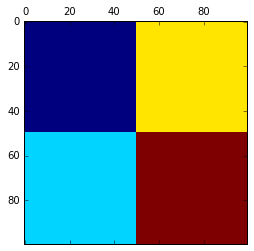

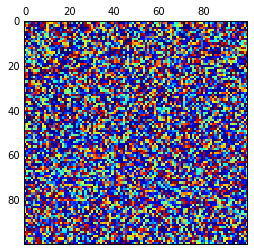

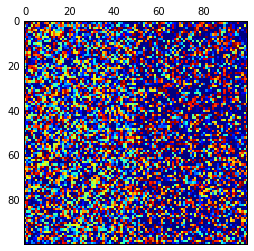

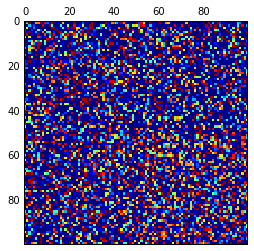

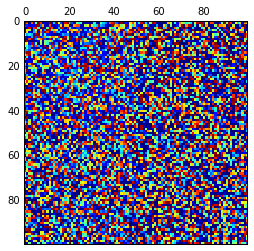

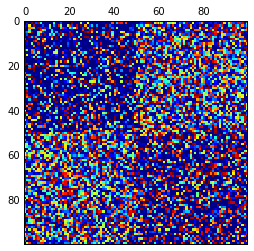

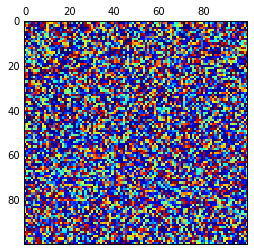

In [37]:
#Plot the World Grid
def show_grid (grid):
    plt.matshow (grid)
for k in country_properties:
    print("Country "+str(k)+" : "+str(np.floor(country_properties[k][len(attributes) - 1])))
print("The plots represent different attributes of the world grid. The first plot is shows the different countries. The other plots show different attributes on a cellular level.")
#"Country No " , "Population Density", "Birth Rate", "Death Rate", "Wealth Score", "Elevation", "Population Counter"
show_grid(world[:,:,0])
show_grid(world[:,:,1])
show_grid(world[:,:,2])
show_grid(world[:,:,3])
show_grid(world[:,:,4])
show_grid(world[:,:,5])
show_grid(world[:,:,6])